# Intelligent Supplier Evaluation & Selection
Problem Description: What is the problem/ issue that is addressed and how is it approached today?
Supplier Evaluation and selection play an important role in Procurement. There is so much information gathered in enterprise for the decision making and it needs to be utilized efficiently to maximize the benefits. The value proposition of benefits is varied across the customer segments.

There is no process that can help predict the best possible characteristics and then maximize the benefits during the Supplier selection process.

# Multi output regression

In [7]:
# Reference: https://machinelearningmastery.com/multi-output-regression-models-with-python/
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.neighbors import KNeighborsRegressor
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [8]:
dataDf = pd.read_csv('Supplier Charateristics.csv', ",")
dataDf

,Current Price,Quality,Delivery,Service
0,4725,4,4,4
1,5130,5,5,4
2,4455,3,3,3
3,4860,5,4,4
4,4995,5,4,4
5,4590,4,3,4
6,4680,4,4,3
7,4940,4,5,5
8,4420,3,3,3
9,4680,4,4,3


In [9]:
dataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Current Price  42 non-null     int64
 1   Quality        42 non-null     int64
 2   Delivery       42 non-null     int64
 3   Service        42 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB


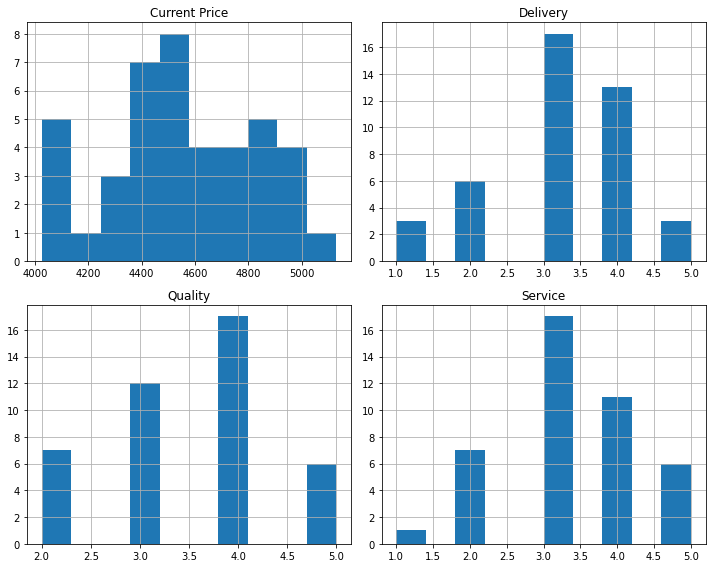

In [10]:
dataDf.hist(figsize=(10,8))
plt.tight_layout()

In [11]:
X = dataDf.drop(columns=['Quality', 'Delivery', 'Service'],axis=1)
y = dataDf[['Quality', 'Delivery', 'Service']]
X

,Current Price
0,4725
1,5130
2,4455
3,4860
4,4995
5,4590
6,4680
7,4940
8,4420
9,4680


In [12]:
y

,Quality,Delivery,Service
0,4,4,4
1,5,5,4
2,3,3,3
3,5,4,4
4,5,4,4
5,4,3,4
6,4,4,3
7,4,5,5
8,3,3,3
9,4,4,3


In [13]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_x

,Current Price
22,4800
23,4440
9,4680
18,4560
5,4590
29,4255
40,4410
35,4070
15,4750
31,4730


# Linear Regression for Multioutput Regression

In [14]:
#Linear regression 
model = LinearRegression()
model.fit(train_x, train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data', predict_train[:5]) 


print('Mean Absolute Error on train dataset : ', mean_absolute_error(train_y, predict_train))
print('Mean Squared Error on train dataset : ', math.sqrt(mean_squared_error(train_y, predict_train)))

Target on train data [[4.40071157 4.00499582 4.22344286]
 [3.1776801  2.82214391 2.9567585 ]
 [3.99303442 3.61071185 3.80121474]
 [3.58535726 3.21642788 3.37898662]
 [3.68727655 3.31499887 3.48454365]]
Mean Absolute Error on train dataset :  0.28260306556812215
Mean Squared Error on train dataset :  0.3665728199082542


In [15]:
test_x

,Current Price
7,4940
25,4830
4,4995
10,4940
12,4625
1,5130
39,4305
30,4400
32,4070


In [16]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data', predict_test[:5]) 


print('Mean Absolute Error on test dataset : ', mean_absolute_error(test_y, predict_test))
print('Mean Squared Error on test dataset : ', math.sqrt(mean_squared_error(test_y, predict_test)))

Target on test data [[4.87633492 4.46499378 4.71604234]
 [4.50263086 4.10356681 4.3289999 ]
 [5.06318695 4.64570726 4.90956356]
 [4.87633492 4.46499378 4.71604234]
 [3.80618239 3.42999836 3.60769352]]
Mean Absolute Error on test dataset :  0.46881460692915583
Mean Squared Error on test dataset :  0.5845821457250611


In [17]:
testData = pd.DataFrame([[3800]])
predict_test = model.predict(testData)
predict_test

array([[1.00340194, 0.71929609, 0.70487518]])

In [18]:
print('Quality = ', round(predict_test[0][0]))
print('Delivery = ', round(predict_test[0][1]))
print('Service = ', round(predict_test[0][2]))

Quality =  1
Delivery =  1
Service =  1


# k-Nearest Neighbors for Multioutput Regression

In [19]:
# KNN algorithm
model = KNeighborsRegressor()
model.fit(train_x, train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data', predict_train[:5]) 

print('Mean Absolute Error on train dataset : ', mean_absolute_error(train_y, predict_train))
print('Mean Squared Error on train dataset : ', math.sqrt(mean_squared_error(train_y, predict_train)))

Target on train data [[4.2 4.  4.4]
 [3.  3.  3. ]
 [4.  4.  3.6]
 [3.8 3.  3.4]
 [3.8 3.  3.4]]
Mean Absolute Error on train dataset :  0.197979797979798
Mean Squared Error on train dataset :  0.3278334142132974


In [20]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data', predict_test[:5]) 


print('Mean Absolute Error on test dataset : ', mean_absolute_error(test_y, predict_test))
print('Mean Squared Error on test dataset : ', math.sqrt(mean_squared_error(test_y, predict_test)))

Target on test data [[4.6 4.  4.8]
 [4.4 4.  4.6]
 [4.6 4.  4.8]
 [4.6 4.  4.8]
 [4.  3.4 3.2]]
Mean Absolute Error on test dataset :  0.45925925925925926
Mean Squared Error on test dataset :  0.573488351136175


In [21]:
testData = pd.DataFrame([[3800]])
predict_test = model.predict(testData)
predict_test

array([[2. , 1.6, 2. ]])

In [22]:
print('Quality = ', round(predict_test[0][0]))
print('Delivery = ', round(predict_test[0][1]))
print('Service = ', round(predict_test[0][2]))

Quality =  2
Delivery =  2
Service =  2


# Decision Tree for Multioutput Regression

In [23]:
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('Mean and Std Dev: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean and Std Dev: 0.163 (0.094)


In [24]:
# predict the target on the train dataset
model.fit(train_x, train_y)
predict_train = model.predict(train_x)
print('Target on train data', predict_train[:5]) 

print('Mean Absolute Error on train dataset : ', mean_absolute_error(train_y, predict_train))
print('Mean Squared Error on train dataset : ', math.sqrt(mean_squared_error(train_y, predict_train)))

Target on train data [[4. 4. 5.]
 [3. 3. 3.]
 [4. 4. 3.]
 [4. 3. 3.]
 [4. 3. 4.]]
Mean Absolute Error on train dataset :  0.0
Mean Squared Error on train dataset :  0.0


In [25]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data', predict_test[:5]) 


print('Mean Absolute Error on test dataset : ', mean_absolute_error(test_y, predict_test))
print('Mean Squared Error on test dataset : ', math.sqrt(mean_squared_error(test_y, predict_test)))

Target on test data [[5. 4. 5.]
 [4. 4. 5.]
 [5. 4. 5.]
 [5. 4. 5.]
 [4. 3. 4.]]
Mean Absolute Error on test dataset :  0.3333333333333333
Mean Squared Error on test dataset :  0.5773502691896257


In [26]:
testData = pd.DataFrame([[3800]])
predict_test = model.predict(testData)
predict_test

array([[2., 1., 1.]])

In [27]:
print('Quality = ', round(predict_test[0][0]))
print('Delivery = ', round(predict_test[0][1]))
print('Service = ', round(predict_test[0][2]))

Quality =  2
Delivery =  1
Service =  1


# Wrapper Multioutput Regression Algorithms

# Case 1: Direct Multioutput Regression
    Develop an independent model for each numerical value to be predicted. This assumes that the outputs are independent of each other, which might not be a correct assumption.
    
    Problem 1: Given 'Current Price', predict 'Quality'.
    Problem 2: Given 'Current Price', predict 'Delivery'.
    Problem 3: Given 'Current Price', predict 'Service'.

    The regression models designed for predicting one value for multioutput regression is to divide the multioutput regression problem into multiple sub-problems.

In [28]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.876 (0.205)


In [29]:
# predict the target on the train dataset
wrapper.fit(train_x, train_y)
predict_train = wrapper.predict(train_x)
print('Target on train data', predict_train[:5]) 

print('Mean Absolute Error on train dataset : ', mean_absolute_error(train_y, predict_train))
print('Mean Squared Error on train dataset : ', math.sqrt(mean_squared_error(train_y, predict_train)))

Target on train data [[4.21052949 2.344333   3.21070675]
 [3.89473526 2.16850338 2.96989904]
 [4.10526474 2.28572312 3.13043751]
 [4.         2.22711325 3.05016827]
 [4.02631619 2.24176572 3.07023558]]
Mean Absolute Error on train dataset :  0.759197465003071
Mean Squared Error on train dataset :  0.9636931388809226


c:\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [30]:
# predict the target on the test dataset
predict_test = wrapper.predict(test_x)
print('Target on test data', predict_test[:5]) 


print('Mean Absolute Error on test dataset : ', mean_absolute_error(test_y, predict_test))
print('Mean Squared Error on test dataset : ', math.sqrt(mean_squared_error(test_y, predict_test)))

Target on test data [[4.33333835 2.41271118 3.3043542 ]
 [4.23684567 2.35898546 3.23077406]
 [4.3815847  2.43957404 3.34114427]
 [4.33333835 2.41271118 3.3043542 ]
 [4.0570184  2.25886027 3.09364745]]
Mean Absolute Error on test dataset :  0.9952871641298499
Mean Squared Error on test dataset :  1.2325913116008491


In [31]:
testData = pd.DataFrame([[3800]])
predict_test = wrapper.predict(testData)
predict_test

array([[3.33332329, 1.8559174 , 2.54179643]])

In [32]:
print('Quality = ', round(predict_test[0][0]))
print('Delivery = ', round(predict_test[0][1]))
print('Service = ', round(predict_test[0][2]))

Quality =  3
Delivery =  2
Service =  3


# Case 2: Chained Multioutput Regression
    Problem 1: Given 'Current Price', predict 'Quality'.
    Problem 2: Given Current Price and Quality_Predicted, predict 'Delivery'.
    Problem 3: Given Current Price, Quality_Predicted, and Delivery_Predicted, predict 'Service'.
The order of the models may be based on the order of the outputs in the dataset (the default) or specified via the “order” 
argument. For example, order=[0,1] would first predict the oth output, then the 1st output, whereas an order=[1,0] would 
first predict the last output variable and then the first output variable in our test problem.        

In [33]:
from sklearn.multioutput import RegressorChain

model = LinearSVR()
# define the chained multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.872 (0.287)


In [34]:
# predict the target on the train dataset
wrapper.fit(train_x, train_y)
predict_train = wrapper.predict(train_x)
print('Target on train data', predict_train[:5]) 

print('Mean Absolute Error on train dataset : ', mean_absolute_error(train_y, predict_train))
print('Mean Squared Error on train dataset : ', math.sqrt(mean_squared_error(train_y, predict_train)))

Target on train data [[2.25617687 3.19153485 4.99825305]
 [2.08695912 2.95216518 4.62337939]
 [2.19977095 3.11174496 4.87329516]
 [2.14336504 3.03195507 4.74833728]
 [2.15746651 3.05190254 4.77957675]]
Mean Absolute Error on train dataset :  1.1007426858415512
Mean Squared Error on train dataset :  1.3661390701641163


c:\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [35]:
# predict the target on the test dataset
predict_test = wrapper.predict(test_x)
print('Target on test data', predict_test[:5]) 


print('Mean Absolute Error on test dataset : ', mean_absolute_error(test_y, predict_test))
print('Mean Squared Error on test dataset : ', math.sqrt(mean_squared_error(test_y, predict_test)))

Target on test data [[2.32198377 3.28462306 5.14403725]
 [2.27027835 3.21148232 5.02949252]
 [2.34783648 3.32119342 5.20130962]
 [2.32198377 3.28462306 5.14403725]
 [2.17391824 3.07517459 4.8160228 ]]
Mean Absolute Error on test dataset :  1.2715810586744782
Mean Squared Error on test dataset :  1.4950638171240191


In [36]:
testData = pd.DataFrame([[3800]])
predict_test = wrapper.predict(testData)
predict_test

array([[1.78612757, 2.5266191 , 3.95693732]])

In [37]:
print('Quality = ', round(predict_test[0][0]))
print('Delivery = ', round(predict_test[0][1]))
print('Service = ', round(predict_test[0][2]))

Quality =  2
Delivery =  3
Service =  4


# Model Metrics
Linear Regression:
 - Mean Absolute Error on test dataset :  0.46881460692915583
 - Mean Squared Error on test dataset :  0.5845821457250611

KNN
 - Mean Absolute Error on test dataset :  0.45925925925925926
 - Mean Squared Error on test dataset :  0.573488351136175

Decision Tree
 - Mean Absolute Error on test dataset :  0.3333333333333333
 - Mean Squared Error on test dataset :  0.5773502691896257

Direct Multioutput Regression
 - Mean Absolute Error on test dataset :  0.9952871641298499
 - Mean Squared Error on test dataset :  1.2325913116008491

Chained Multioutput Regression
 - Mean Absolute Error on test dataset :  1.2715810586744782
 - Mean Squared Error on test dataset :  1.4950638171240191